# import required libraries

In [2]:
import numpy as np
from numpy import cos, sin, conjugate, pi, sqrt
from math import factorial, atan2
from cmath import exp
import cmath
import matplotlib.pyplot as plt
import cv2
from pylab import gray, imshow, show 
import matplotlib.pyplot as plt 
import pathlib
from os import listdir
from os.path import isfile, join

# polynômes radiaux de Zernike

In [3]:
def polyradial(r,n,m):
    Rnm = np.zeros(r.shape)
    for s in range(0, ((n-abs(m))//2)+1):
        c = (-1)**(s) * ( factorial(n-s) / ((factorial(s)) * (factorial((n+abs(m))/2-s)) * (factorial((n-abs(m))/2-s))))
        Rnm = Rnm + c *  r**(n - 2*s)
        #print("s=",s)
    return Rnm


# zernike moments

In [4]:
def Zernikmoment(img,n,m):
    N  = img.shape[0]
    x = np.arange(0 , N)
    x = np.array([x])
    y = x
    X, Y = np.meshgrid(x, y)
    R = np.sqrt((2*X-N+1)**2+(N-1-2*Y)**2) / N
    Theta = np.arctan2((N-1-2*Y),(2*X-N+1))
    R[R>1]= 0 # r inside unit circle
    Rnm = polyradial(R,n,m)
    Product = img*Rnm*np.exp(-1j*m*Theta)
    #Z = (Product).sum()
    Z = (Product.ravel()).sum()
    cnt = np.count_nonzero(R) # count the number of pixels inside the unit circle
    Z = (n+1)*Z/cnt # normalize the amplitude of moments
    A = abs(Z)
    Phi = np.angle(Z)*180/pi
    return Z, A, Phi

# main

les moments ART pour n= 2 et m= 4


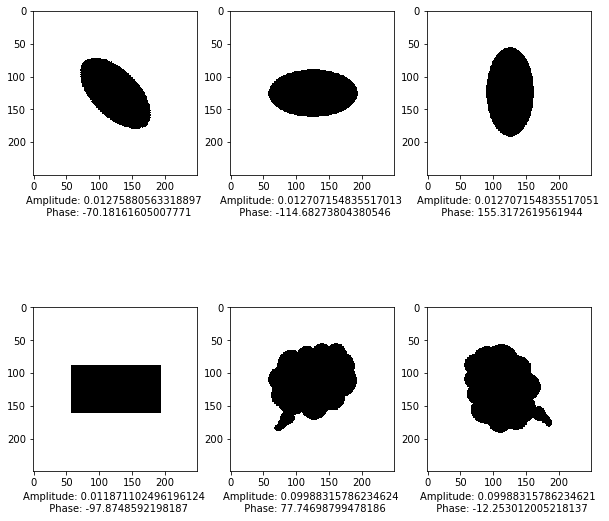

In [5]:
print('les moments ART pour n= 2 et m= 4')
n= 5; m= 1
mypath=r'E:\indexaxtion dimage\moments ART\images de test'
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
images = np.empty(len(onlyfiles), dtype=object)
for i in range(0, len(onlyfiles)):
    paths = join(mypath,onlyfiles[i])
    images[i] = cv2.imread( paths,-1)
    img = cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY)
    img = np.logical_not(img)
    img = ~img
    fig   = plt.figure(1, figsize=(10,10))
    plt.subplot(2,3,i+1)
    plt.imshow(img, cmap="gray")
    Z, A, Phi = Zernikmoment(img,n,m);      # Call Zernikemoment fuction
   
    #plt.title('(amplitude,phase) ='+repr(Amp))
    plt.xlabel('Amplitude: {} \n  Phase: {}'.format(A, Phi))
    #print("les amplitudes=",Amp)
    #print('les phases= ',Phi)
plt.show()

# Calculate higher order moments

### define the order n and the repetition m 

In [8]:
m = []
n = []
N = np.arange(0 , 8)
M = np.arange(0 , 8)
for i in range (0,8):
    for j in range (0,8):
        if(((N[i] - abs(M[j])) % 2 == 0 ) and (abs(M[j]) <= N[i])): # n - |m| = pair et |m| <= n
            n.append(N[i])
            m.append(M[j])
            print((N[i],M[j]))
print("order n = ",n)
print(len(n))
print("repition m = ",m)
print(len(m))




(0, 0)
(1, 1)
(2, 0)
(2, 2)
(3, 1)
(3, 3)
(4, 0)
(4, 2)
(4, 4)
(5, 1)
(5, 3)
(5, 5)
(6, 0)
(6, 2)
(6, 4)
(6, 6)
(7, 1)
(7, 3)
(7, 5)
(7, 7)
order n =  [0, 1, 2, 2, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7]
20
repition m =  [0, 1, 0, 2, 1, 3, 0, 2, 4, 1, 3, 5, 0, 2, 4, 6, 1, 3, 5, 7]
20


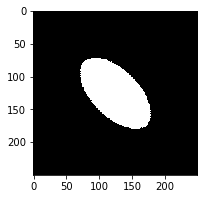

****************************** Résultats**********************************
amplitude of moments =  [0.15236, 0.00344, 0.3724, 0.02399, 0.00995, 0.00111, 0.39919, 0.09026, 0.00423, 0.01276, 0.00462, 0.00031, 0.25609, 0.15929, 0.02136, 0.0008, 0.01065, 0.00873, 0.00166, 8e-05]


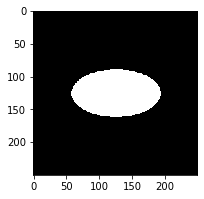

****************************** Résultats**********************************
amplitude of moments =  [0.15605, 0.00347, 0.37968, 0.02486, 0.01, 0.00111, 0.4025, 0.09294, 0.00441, 0.01271, 0.0046, 0.0003, 0.25152, 0.1622, 0.0221, 0.00082, 0.01039, 0.00864, 0.00161, 8e-05]


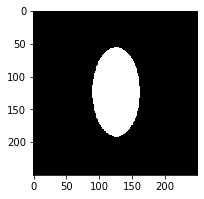

****************************** Résultats**********************************
amplitude of moments =  [0.15605, 0.00347, 0.37968, 0.02486, 0.01, 0.00111, 0.4025, 0.09294, 0.00441, 0.01271, 0.0046, 0.0003, 0.25152, 0.1622, 0.0221, 0.00082, 0.01039, 0.00864, 0.00161, 8e-05]


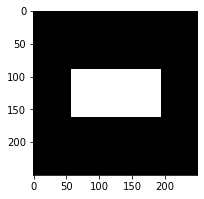

****************************** Résultats**********************************
amplitude of moments =  [0.19951, 0.00451, 0.44721, 0.04249, 0.01138, 0.00192, 0.38702, 0.14797, 0.00252, 0.01187, 0.00717, 0.00017, 0.14223, 0.22689, 0.01191, 0.00224, 0.01101, 0.01104, 0.00087, 0.0002]


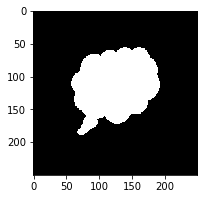

****************************** Résultats**********************************
amplitude of moments =  [0.24853, 0.0409, 0.53741, 0.02229, 0.1076, 0.0043, 0.4122, 0.06886, 0.00783, 0.09988, 0.01606, 0.00116, 0.0611, 0.08547, 0.0321, 0.0026, 0.0159, 0.02395, 0.00611, 0.00099]


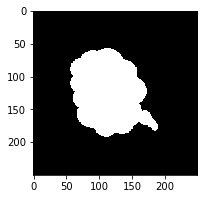

****************************** Résultats**********************************
amplitude of moments =  [0.24853, 0.0409, 0.53741, 0.02229, 0.1076, 0.0043, 0.4122, 0.06886, 0.00783, 0.09988, 0.01606, 0.00116, 0.0611, 0.08547, 0.0321, 0.0026, 0.0159, 0.02395, 0.00611, 0.00099]


In [15]:
mypath=r'E:\indexaxtion dimage\moments ART\images de test'
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
images = np.empty(len(onlyfiles), dtype=object)
for i in range(0, len(onlyfiles)):
    paths = join(mypath,onlyfiles[i])
    images[i] = cv2.imread( paths,-1)
    img = cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY)
    img = np.logical_not(img)
    #img = ~img
    fig   = plt.figure(1, figsize=(10,10))
    plt.subplot(2,3,i+1)
    plt.imshow(img, cmap="gray")
    A_Z_m = []
    for i in range (0,20):
    
        [Z, A, Phi] = Zernikmoment(img,n[i],m[i])    # Call Zernikemoment fuction
        A_Z_m.append(round(A,5)) 
    plt.show()    
    print('****************************** Résultats**********************************')
    print('amplitude of moments = ', A_Z_m)
    #print('phase of the mement (in degrees) = ', Phi)